# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/bank_customer.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.iloc[:,1:].describe(exclude=["object"])

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


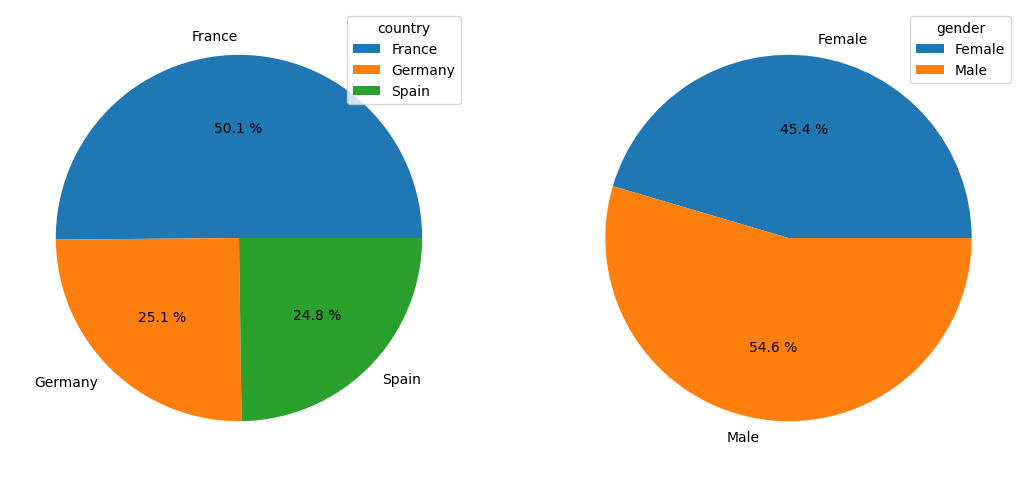

In [16]:
# plot object columns ('country' and 'gender')
plt.figure(figsize=(13,7))
obj_cols = df.select_dtypes("object").columns.to_list()
num_plt = 120

for col in obj_cols:
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    num_plt += 1

    plt.subplot(num_plt)
    plt.pie(df_["count"], labels=df_[col], autopct="%0.1f %%")
    plt.legend(title=col)
plt.show()

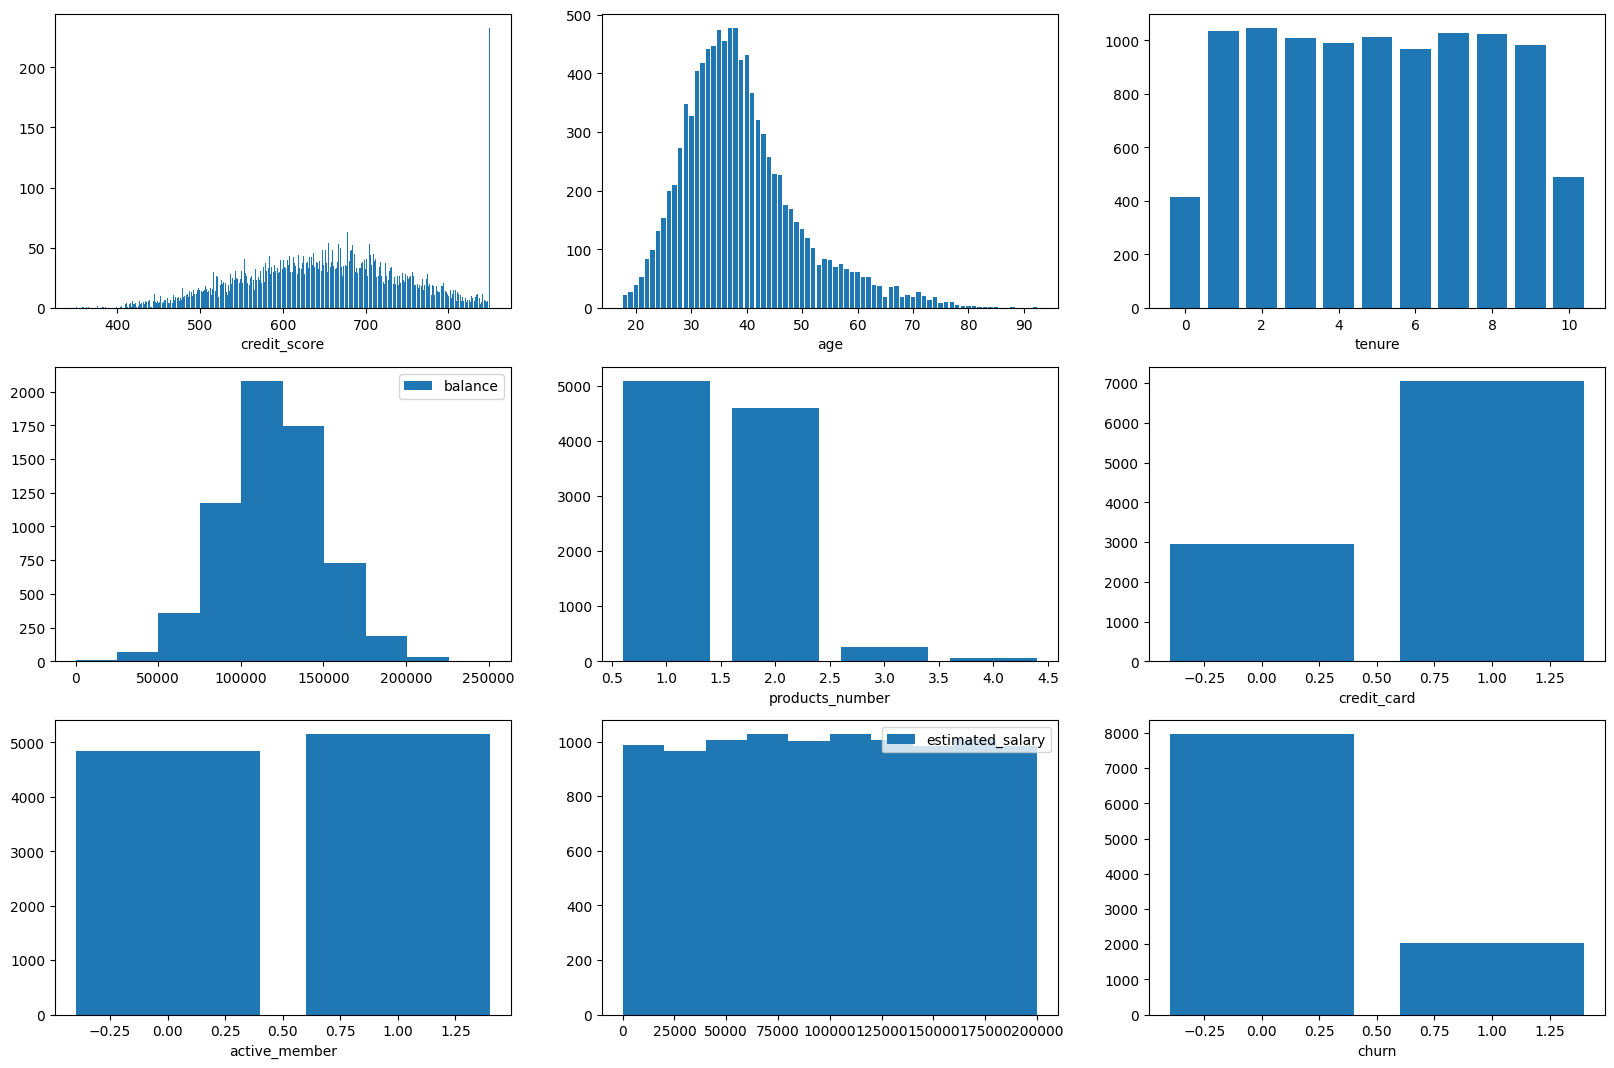

In [17]:
# plot numeric columns (int and float data types)
plt.figure(figsize=(20,13))
num_cols = df._get_numeric_data().columns.to_list()[1:]
float_cols = df.select_dtypes("float64").columns.to_list()
num_plt = 330

for col in num_cols:
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    num_plt += 1

    plt.subplot(num_plt)
    if col in float_cols:
        plt.hist(df_[col], bins=10, label=col)
        plt.legend()
    else:
        plt.bar(df_[col], df_["count"])
        plt.xlabel(col)
plt.show()

<AxesSubplot: xlabel='products_number', ylabel='count'>

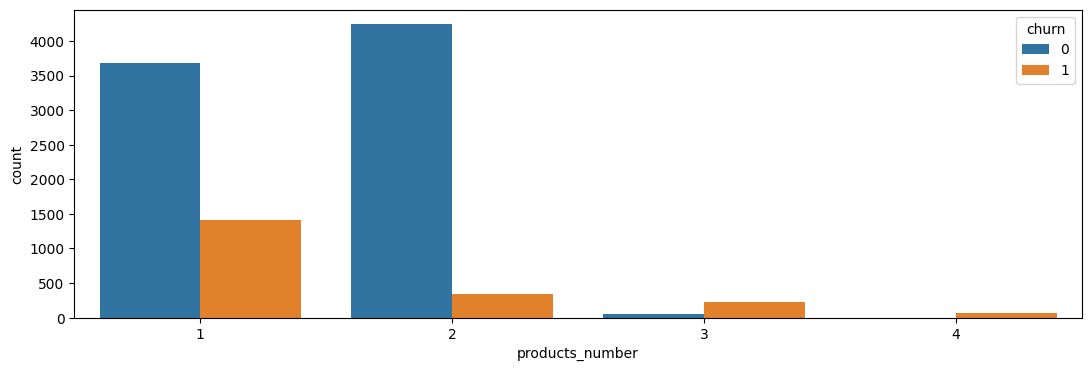

In [86]:
# relationship between 'products number' and 'customer churn'
plt.figure(figsize=(13,4))
sns.countplot(data=df, x="products_number", hue="churn")

<AxesSubplot: xlabel='age', ylabel='Density'>

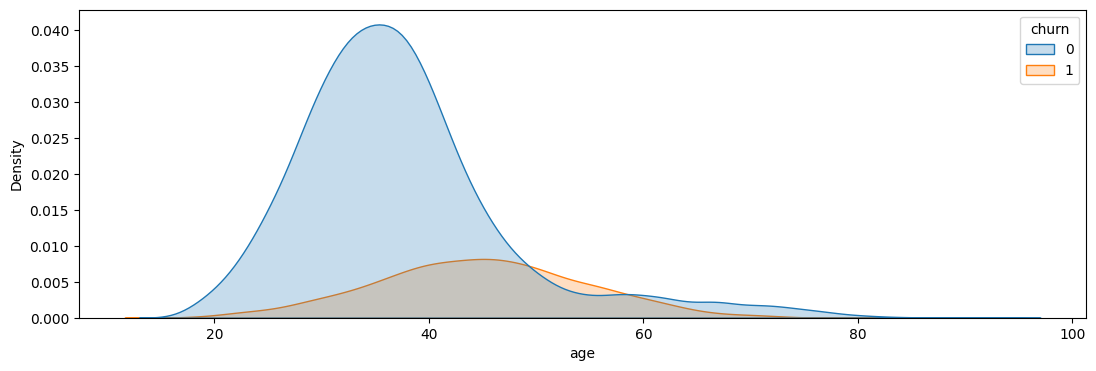

In [90]:
# plot the density of customers based on 'age customer'
plt.figure(figsize=(13,4))
sns.kdeplot(data=df, x="age", hue="churn", fill=True)

<AxesSubplot: xlabel='gender', ylabel='age'>

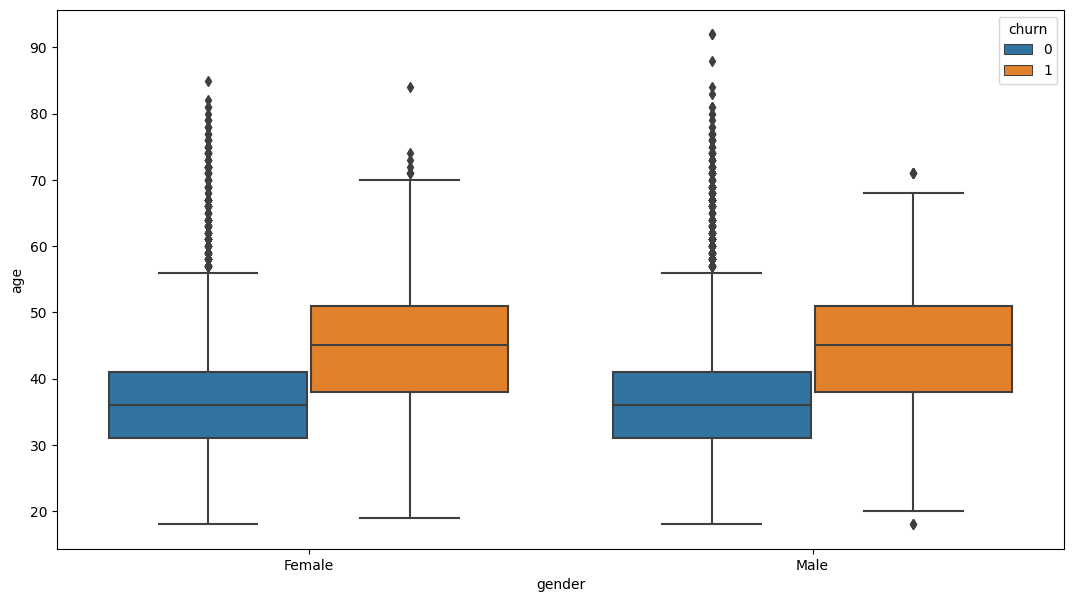

In [94]:
# boxplot from 'gender' group by 'churn' for 'age customer'
plt.figure(figsize=(13,7))
sns.boxplot(data=df, x="gender", y="age", hue="churn")